# Pandas

Pandas è una libreria per la manipolazione di dati in formato *sequenziale o tabellare*, quali serie temporali o dati di microarray.

Caratteristiche principali di Pandas sono:

- **Caricamento** e **salvataggio** di formati standard per dati tabellari, quali *CSV*
  (Comma-separated Values), *TSV* (Tab-separated Values), file *Excel* e formati per
  *database* 

- Semplicità nella esecuzione di operazioni di **indicizzazione** e **aggregazione** di dati

- Semplicità nella esecuzione di operazioni **numeriche** e **statistiche**

- Semplicità nella **visualizzazione** dei risultati delle operazioni

Il sito ufficiale del progetto [http://pandas.pydata.org/](http://pandas.pydata.org/) contiene molte informazioni aggiuntive, documentazione etc. 

Pandas si importa come qualsiasi altro modulo. La sintassi comune è 

In [2]:
import pandas as pd

Dove `as pd` permette di riferirsi al modulo con l'abbreviazione `pd`

# Matplotlib

Matplotlib è una libreria per la realizzazione di grafici estremamente potente e flessibile.

Il modulo `pyplot` della libreria permette di realizzare in maniera semplice moltissimi tipi di plots.

Il modulo si importa di solito rinominandolo `plt`

In [2]:
import matplotlib.pyplot as plt 

Usando `matplotlib.pyplot` si importa solo il modulo `pyplot` della libreria. 

Per le nostre esigenze sarà sufficiente il metodo `plt.show()`.

## Datatypes Pandas 

Pandas fornisce due tipi di dati molto utili, le ``Series`` ed i ``DataFrame``:

- ``Series`` rappresenta dati 1D, come le serie temporali

- ``DataFrame`` rappresenta dati 2D, praticamente qualunque insieme di dati in forma tabellare

Ogni colonna di un ``DataFrame`` è una ``Series``. Per questo questo vedremo prima le ``Series`` e molto di quello che vedremo sarà applicabile anche ai ``DataFrame``.


## ``Series``

Una ``Series`` è un vettore **mono-dimensionale** i cui elementi sono etichettati con un ``index``. 

In questo senso, la ``Series`` opera un po' come una lista (si possono accedere gli elementi in sequenza) e un po' come un dizionario (si può accedere ad un elemento tramite il suo indice, che opera come una chiave e non deve essere per forza numerico)


### Creazione di ``Series``

Una ``Series`` può essere creata tramite la funzione `pd.Series()`:

- Specificando sia dati che indici

In [3]:
s = pd.Series([2.5,3.6,5.7,5.8],index=[0,5,15,30])
s

0     2.5
5     3.6
15    5.7
30    5.8
dtype: float64

- Passando un dizionario (le chiavi diventano gli indici e i valori i dati)

In [4]:
s = pd.Series({"a": 342, "c": 245, "g" : 546, "t" : 222})
s

a    342
c    245
g    546
t    222
dtype: int64

- Passando solo i dati (gli indici saranno sequenziali a partire da 0)

In [5]:
s = pd.Series([2.5,3.6,5.7,5.8])
s

0    2.5
1    3.6
2    5.7
3    5.8
dtype: float64

In [ ]:
## Accedere ad una ``Series``

Si può accedere ad una ``Series`` sia tramite indice (come nei dizionari), 
sia tramite posizione (come nelle liste)

In [11]:
s = pd.Series({"a": 342, "c": 245, "g" : 546, "t" : 222})
s["c"]

245

In [ ]:
s[-1]

In [ ]:
Gli indici sono praticamente delle etichette associate alle posizioni corrispondenti, 
per cui si possono usare per estrarre porzioni di ``Series``

In [8]:
s["c":"t"]

c    245
g    546
t    222
dtype: int64

In [ ]:
Attenzione: la sottoserie va da indice iniziale a indice finale *compreso*

E' anche possibile passare una lista di indici da estrarre

In [9]:
s[["a", "g"]]

a    342
g    546
dtype: int64

### Operazioni su ``Series``

Le operazioni aritmetiche su una ``Series`` si applicano a tutti i suoi elementi (tale operazione viene detta *broadcasting*)

In [ ]:
s + 1

In [12]:
s *= 2
s

a     684
c     490
g    1092
t     444
dtype: int64

E' ovviamente sempre possibile eseguire un'operazione su un solo elemento riferendosi ad esso per posizione o indice

In [ ]:
s['c'] += 1
s

Anche i *test logici* si applicano a tutti gli elementi

In [ ]:
s > 1000

Il risultato è una ``Series`` con come valori ``True`` dove la condizione è soddisfatta, ``False`` dove non lo è.

Queste serie vengono chiamate *maschere* e permettono di scegliere solo gli elementi che soddisfano la condizione

In [13]:
s[s > 1000]

g    1092
dtype: int64

o che non la soddisfano (utile quando non è facile invertire la condizione)

In [14]:
s[~(s > 1000)]

a    684
c    490
t    444
dtype: int64

La somma tra due serie le somma elemento per elemento, allineandole per indice.

In [15]:
s + pd.Series({"a" : 1234, "g" : 3451})

a    1918.0
c       NaN
g    4543.0
t       NaN
dtype: float64

Se un indice non è presente in una delle serie, il risultato è `Nan` (not a number).

Usando il metodo ``add`` è possibile specificare un valore di default da usare quando un indice non è presente

In [16]:
s1 = pd.Series({"a" : 1234, "g" : 3451})
s.add(s1, fill_value=0)

a    1918.0
c     490.0
g    4543.0
t     444.0
dtype: float64

### Statistiche con `Series`

- Somma e prodotto di tutti gli elementi 

In [ ]:
s.sum()

In [ ]:
s.product()

- Massimo (o minimo) tra gli elementi, ed indice corrispondente

In [ ]:
s.max()

In [ ]:
s.argmax()

- Media, deviazione standard (e molte altre)

In [ ]:
s.mean()

In [ ]:
s.std()

- Vari tipi di correlazione (tra una o più serie)

In [19]:
s.corr(s) # pearson di default

1.0

In [18]:
s.corr(s, method='spearman')

1.0

- conteggi di occorrenze dei valori 

In [4]:
s = pd.Series([1,2,1,1,1,2,3,4,4,4,2,3,4,3,1,1,2])

s.value_counts()

1    6
4    4
2    4
3    3
dtype: int64

### Grafici con `Series`

E' possibile visualizzare il contenuto di una serie o il risultato di operazioni eseguite su serie tramite la libreria `matplotlib`

In [20]:
import matplotlib.pyplot as plt

- Utilizzando un *line plot* (il default)

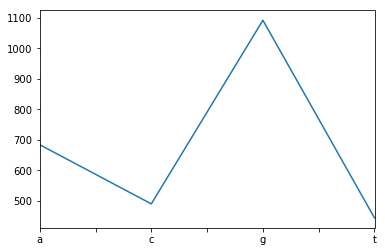

In [21]:
s.plot()
plt.show()

- Utilizzando un *bar plot*

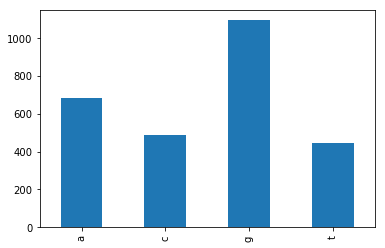

In [22]:
s.plot(kind='bar')
plt.show()

E in molti altri modi: [http://pandas.pydata.org/pandas-docs/stable/visualization.html](http://pandas.pydata.org/pandas-docs/stable/visualization.html)

In [ ]:
Per salvare il plot su file usare il metodo `savefig` di `pyplot`

In [ ]:
s.plot(kind='bar')
plt.savefig("bar.png")

## `DataFrame`

Un ``DataFrame`` è praticamente una **tabella** di oggetti eterogenei.
In pratica è l'equivalente bi-dimensionale di una `Series`.

Un ``DataFrame`` ha indici sia per le righe che per le colonne:

- ``index`` rappresenta le etichette delle **righe**

- ``columns`` rappresenta le etichette delle **colonne**

In aggiunta, l'attributo ``shape`` descrive le **dimensioni** della tabella

Ogni colonna di un ``DataFrame`` è una  ``Series``. Tutte le operazioni viste per le serie
possono essere applicate a colonne estratte da un  ``DataFrame``.

Inoltre molte delle operazioni definite per le ``Series`` possono essere applicate direttamente su un ``DataFrame``

|

### Creazione di  `DataFrame`

Ci sono molti modi per creare un `DataFrame`. I più semplici sono:

- Da un dizionario di liste

In [ ]:
d = {'cond1' : [0.5,-0.4,1.2,-2.1,2.3], 'cond2' : [0.6,-0.1,-0.1,-0.9,1.8]}
df = pd.DataFrame(d, index=['gene1','gene2','gene3','gene4','gene5'])
df
df = pd.DataFrame(d)
df

- Da un file in formato tabellare (e.g. CSV)

In [23]:
df = pd.read_csv('breast_cancer.txt', delimiter='\t')

In [24]:
list(df.index)


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [25]:
df.columns

Index(['METABRIC_ID', 'age_at_diagnosis', 'last_follow_up_status',
       'menopausal_status_inferred', 'group', 'grade', 'size', 'stage',
       'lymph_nodes_positive', 'lymph_nodes_removed', 'NPI',
       'histological_type', 'ER_IHC_status', 'HER2_IHC_status',
       'HER2_SNP6_state', 'cellularity', 'P53_mutation_status',
       'P53_mutation_type', 'P53_mutation_details', 'Pam50Subtype',
       'IntClustMemb', 'Treatment', 'Site', 'Genefu', 'ER.Expr', 'Her2.Expr',
       'PR.Expr', 'T'],
      dtype='object')

In [ ]:
df.shape

File excel possono essere letti con `read_excel`

E' possibile accedere ad un estratto del `DataFrame` con il metodo `head`

In [26]:
df.head()

METABRIC_ID  age_at_diagnosis last_follow_up_status  \
0     MB-0002             43.19                     a   
1     MB-0008             76.97                d-d.s.   
2     MB-0010             78.77                d-d.s.   
3     MB-0035             84.22                     d   
4     MB-0036             85.49                     a   

  menopausal_status_inferred  group  grade  size  stage  lymph_nodes_positive  \
0                        pre      4      3  10.0      1                     0   
1                       post      4      3  40.0      2                     8   
2                       post      4      3  31.0      4                     0   
3                       post      4      2  28.0      2                     0   
4                       post      4      2  22.0      4                     0   

  lymph_nodes_removed   ...    \
0                  25   ...     
1                   8   ...     
2                  14   ...     
3                  16   ...     
4                  23   ...     

                                P53_mutation_details Pam50Subtype  \
0  MB-AD-0002+ex5,6+chr17:7519122+12521A>AC+178H>...         LumA   
1                                                NaN         LumB   
2                                                NaN         LumB   
3                                                NaN         Her2   
4                                                NaN         LumA   

  IntClustMemb Treatment Site                 Genefu ER.Expr Her2.Expr  \
0            4     HT/RT    1  ER+/HER2-_High_Prolif       +         -   
1            9  CT/HT/RT    1  ER+/HER2-_High_Prolif       +         -   
2            7     HT/RT    1  ER+/HER2-_High_Prolif       +         -   
3            3      NONE    1  ER+/HER2-_High_Prolif       +         -   
4            3     HT/RT    1   ER+/HER2-_Low_Prolif       +         -   

  PR.Expr       T  
0       +  1484.0  
1       +  1241.0  
2       +   234.0  
3       -  1088.0  
4       +  2314.0  

[5 rows x 28 columns]

### Estrazione di righe e colonne

- Estrazione di colonne tramite indici di colonna

In [ ]:
df['age_at_diagnosis']

In [27]:
df[['Pam50Subtype','stage']]

Pam50Subtype  stage
0           LumA      1
1           LumB      2
2           LumB      4
3           Her2      2
4           LumA      4
5         Normal      2
6           LumA      1
7           LumB      2
8           LumB      2
9         Normal      2
10          LumB      2
11          LumA      3
12          LumA      3
13         Basal      2
14          LumA      2
15          LumB      2
16          LumB      2
17          LumA      2
18          LumA      2
19          LumB      2
20          LumA      2
21          LumA      2
22          LumA      2
23          LumB      2
24          LumA      1
25          LumA      1
26          LumA      2
27          LumB      2
28          LumA      1
29          LumA      2
..           ...    ...
769         LumA      0
770         LumA      0
771         LumA      0
772         LumA      0
773         LumA      0
774        Basal      0
775         LumA      0
776         LumA      0
777         LumA      0
778         LumA      0
779         LumA      0
780         LumB      0
781         LumA      0
782        Basal      0
783         LumA      0
784        Basal      0
785         LumB      0
786         LumB      0
787         Her2      0
788         LumB      0
789         LumB      0
790         LumA      0
791         LumA      0
792         Her2      0
793        Basal      0
794         LumA      0
795         LumB      0
796         LumA      0
797         LumB      0
798        Basal      0

[799 rows x 2 columns]

- Estrazione di righe tramite indici di riga

In [ ]:
df.loc[0]

In [28]:
df.loc[[0,5,15]]

METABRIC_ID  age_at_diagnosis last_follow_up_status  \
0      MB-0002             43.19                     a   
5      MB-0050             44.64                     a   
15     MB-0119             82.73                     a   

   menopausal_status_inferred  group  grade  size  stage  \
0                         pre      4      3  10.0      1   
5                         pre      4      2  33.0      2   
15                       post      4      2  23.0      2   

    lymph_nodes_positive lymph_nodes_removed   ...    \
0                      0                  25   ...     
5                      3                  17   ...     
15                     1                  17   ...     

                                 P53_mutation_details Pam50Subtype  \
0   MB-AD-0002+ex5,6+chr17:7519122+12521A>AC+178H>...         LumA   
5   MB-AD-0050+ex5,6+chr17:7519122+12521A>AC+178H>...       Normal   
15                                                NaN         LumB   

   IntClustMemb Treatment Site                 Genefu ER.Expr Her2.Expr  \
0             4     HT/RT    1  ER+/HER2-_High_Prolif       +         -   
5             8  CT/HT/RT    1   ER+/HER2-_Low_Prolif       +         -   
15            7     HT/RT    1  ER+/HER2-_High_Prolif       +         -   

   PR.Expr       T  
0        +  1484.0  
5        +  1784.0  
15       -   364.0  

[3 rows x 28 columns]

- Estrazione di righe tramite posizioni di riga

In [ ]:
df[0:5]
df.loc[0:5]

### Operazioni su `DataFrame`

Le operazioni sulle `Series` si applicano in maniera analoga ai `DataFrame` 

In [ ]:
df[df['stage'] > 1]

In [29]:
df[df['stage'] > 1][['Pam50Subtype','stage']]

Pam50Subtype  stage
1           LumB      2
2           LumB      4
3           Her2      2
4           LumA      4
5         Normal      2
7           LumB      2
8           LumB      2
9         Normal      2
10          LumB      2
11          LumA      3
12          LumA      3
13         Basal      2
14          LumA      2
15          LumB      2
16          LumB      2
17          LumA      2
18          LumA      2
19          LumB      2
20          LumA      2
21          LumA      2
22          LumA      2
23          LumB      2
26          LumA      2
27          LumB      2
29          LumA      2
32          LumB      2
34         Basal      2
35          LumB      3
39         Basal      2
40         Basal      2
..           ...    ...
454        Basal      2
458         LumB      2
459         LumA      2
464         Her2      3
468         LumA      2
474         Her2      2
475         LumB      2
478         LumA      2
479         LumA      3
480       Normal      2
481         LumA      2
483         LumA      2
486        Basal      2
488         Her2      3
489         Her2      2
491       Normal      2
493         Her2      2
495         LumB      2
496         Her2      3
497        Basal      2
498         LumB      2
499         LumB      3
501         LumA      2
502         Her2      2
503        Basal      2
504         LumB      2
506        Basal      2
508         LumA      2
516         LumB      2
522         LumA      2

[332 rows x 2 columns]

Le statistiche si possono applicare a singole colonne o all'intera tabella

In [ ]:
df['age_at_diagnosis'].mean()

In [ ]:
df.mean()

In [ ]:
df.std()

### Raggruppare righe

E' possibile raggruppare righe in base ad il valore di una certa colonna. In tal modo è possibile calcolare statistiche stratificate 

In [30]:
df.groupby('Pam50Subtype').mean()

age_at_diagnosis     group     grade       size     stage  \
Pam50Subtype                                                              
Basal                52.705909  2.840909  2.954545  26.539773  1.215909   
Her2                 57.585821  2.537313  2.850746  32.373134  1.149254   
LumA                 60.841333  2.360000  2.173333  23.664000  1.018667   
LumB                 63.743860  2.497674  2.604651  27.720930  1.237209   
Normal               56.403148  2.981481  2.351852  27.703704  1.444444   

              lymph_nodes_positive       NPI  IntClustMemb      Site  \
Pam50Subtype                                                           
Basal                     1.636364  4.666591      8.068182  1.977273   
Her2                      3.432836  4.915522      5.014925  2.119403   
LumA                      1.282667  3.759093      5.381333  1.992000   
LumB                      2.627907  4.446140      5.148837  1.888372   
Normal                    2.259259  4.074074      4.388889  1.592593   

                        T  
Pam50Subtype               
Basal         2459.454545  
Her2          2430.000000  
LumA          3093.360000  
LumB          2695.865116  
Normal        2312.462963

In [31]:
df.groupby('Treatment')['size'].mean()

Treatment
CT          23.470588
CT/HT       22.692308
CT/HT/RT    35.000000
CT/RT       31.621429
HT          25.021739
HT/RT       25.483395
NONE        23.784314
RT          20.326531
Name: size, dtype: float64

E' possibile applicare funzioni arbitrarie ad un DataFrame (o ad una sua parte) tramite il metodo `apply` che prende come argomento la funzione da applicare.

In [32]:
df.groupby('Pam50Subtype')['stage'].apply(pd.Series.value_counts)

Pam50Subtype   
Basal         2     34
              0     29
              1     18
              3      7
Her2          0     28
              2     18
              1     11
              3     10
LumA          0    145
              2    122
              1     94
              3     12
              4      2
LumB          2     81
              0     67
              1     51
              3     11
              4      5
Normal        2     25
              0     13
              1     11
              3      3
              4      2
Name: stage, dtype: int64